<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/final_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,654 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading datab

In [1]:
#  Directory 변경 (모듈이용)
%pwd
%cd '../content/notebooks'

# module import
## Data Load
from pickle5 import pickle 

## Basic module
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#waring
import warnings
warnings.filterwarnings('ignore')

/content/drive/My Drive/Colab Notebooks


In [11]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜진짜최종/Rank_처리필요_변화률_df/확인용.pkl','rb') as read_df:
  test = pickle.load(read_df)

In [41]:
test.columns

Index(['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
  

In [42]:
all_cols = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [75]:
apps_col = ['고객번호', '성별', '연령대', '거주지역', '객단가_Net', '객단가_abs', 
            '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [44]:
pr_col = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs','wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [58]:
amt_col = ['고객번호', '성별', '연령대', '거주지역', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [63]:
pr_amt = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [69]:
app_ratio = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs',  '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [72]:
app_amt = ['고객번호', '성별', '연령대', '거주지역', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [83]:
nothing = ['고객번호', '성별', '연령대', '거주지역','객단가_Net', '객단가_abs',  'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [90]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(20,15))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond))

In [78]:
# test1 -entire df ; logistic - 0.5197799318836783
df = test.copy()
get_corr(test,0.69,1) #검증 # all

{'기타_app_r_Net': '기타_구매금액_r_Net', '기타_구매금액_r_Net': '기타_r_Net', '디지털/가전_r_Net': '디지털/가전_구매금액_r_Net', '디지털/가전_app_r_Net': '디지털/가전_구매금액_r_Net', '교육/문화용품_app_r_Net': '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_Net': '교육/문화용품_r_Net', '교육/문화용품_r_abs': '교육/문화용품_구매금액_r_abs', '교육/문화용품_구매금액_r_abs': '교육/문화용품_r_abs', '기타_구매금액_r_abs': '기타_r_abs', '기타_r_abs': '기타_구매금액_r_abs', '전문스포츠/레저_r_Net': '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_Net': '전문스포츠/레저_r_Net', '명품_app_r_abs': '명품_구매금액_r_abs', '명품_r_abs': '명품_구매금액_r_abs', '패션잡화_app_r_Net': '패션잡화_구매금액_r_Net', '패션잡화_구매금액_r_Net': '패션잡화_app_r_Net', '디지털/가전_r_abs': '디지털/가전_구매금액_r_abs', '디지털/가전_app_r_abs': '디지털/가전_구매금액_r_abs', '교육/문화용품_r_Net': '교육/문화용품_구매금액_r_Net', '가구/인테리어_app_r_Net': '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_Net': '가구/인테리어_app_r_Net', '명품_r_Net': '명품_구매금액_r_Net', '명품_구매금액_r_Net': '명품_app_r_Net', '기타_r_Net': '기타_구매금액_r_Net', '디지털/가전_구매금액_r_Net': '디지털/가전_app_r_Net', '디지털/가전_구매금액_r_abs': '디지털/가전_app_r_abs', '명품_구매금액_r_abs': '명품_app_r_abs', '명품_app_r_Net'

In [76]:
# test2 -only apps #0.526329578202777
df = test[apps_col]
get_corr(df,0.69,1) #검증 # only-apps

{}


In [54]:
# test3 -only purchase ratio # 0.5273
df = test[pr_col]
get_corr(df,0.69,1)

{}


In [59]:
# test4 - only amount ratio # 0.5297
df = test[amt_col]
get_corr(df,0.69,1)

{}


In [67]:
# test 5 - ratio_amt  #0.5200
df = test[pr_amt]
get_corr(df,0.69,1)

{'교육/문화용품_구매금액_r_abs': '교육/문화용품_r_abs', '교육/문화용품_r_abs': '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_abs': '기타_r_abs', '기타_r_abs': '기타_구매금액_r_abs', '전문스포츠/레저_r_Net': '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_Net': '전문스포츠/레저_r_Net', '교육/문화용품_r_Net': '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_Net': '교육/문화용품_r_Net', '명품_r_Net': '명품_구매금액_r_Net', '명품_구매금액_r_Net': '명품_r_Net', '기타_구매금액_r_Net': '기타_r_Net', '기타_r_Net': '기타_구매금액_r_Net', '디지털/가전_구매금액_r_Net': '디지털/가전_r_Net', '디지털/가전_r_Net': '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs': '디지털/가전_r_abs', '디지털/가전_r_abs': '디지털/가전_구매금액_r_abs', '명품_r_abs': '명품_구매금액_r_abs', '명품_구매금액_r_abs': '명품_r_abs'}


In [70]:
# test 6 - app_pr_ratio #0.5260675923500131
df = test[app_ratio]
get_corr(df,0.69,1)

{'디지털/가전_r_Net': '디지털/가전_app_r_Net', '디지털/가전_app_r_Net': '디지털/가전_r_Net', '명품_r_abs': '명품_app_r_abs', '명품_app_r_abs': '명품_r_abs', '디지털/가전_r_abs': '디지털/가전_app_r_abs', '디지털/가전_app_r_abs': '디지털/가전_r_abs'}


In [73]:
# test 7 - app_amt
df = test[app_amt] #0.5223997904113178
get_corr(df,0.69,1)

{'기타_구매금액_r_Net': '기타_app_r_Net', '기타_app_r_Net': '기타_구매금액_r_Net', '교육/문화용품_구매금액_r_Net': '교육/문화용품_app_r_Net', '교육/문화용품_app_r_Net': '교육/문화용품_구매금액_r_Net', '패션잡화_app_r_Net': '패션잡화_구매금액_r_Net', '패션잡화_구매금액_r_Net': '패션잡화_app_r_Net', '가구/인테리어_app_r_Net': '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_Net': '가구/인테리어_app_r_Net', '명품_구매금액_r_abs': '명품_app_r_abs', '명품_app_r_abs': '명품_구매금액_r_abs', '명품_구매금액_r_Net': '명품_app_r_Net', '명품_app_r_Net': '명품_구매금액_r_Net', '디지털/가전_app_r_abs': '디지털/가전_구매금액_r_abs', '디지털/가전_구매금액_r_abs': '디지털/가전_app_r_abs', '디지털/가전_구매금액_r_Net': '디지털/가전_app_r_Net', '디지털/가전_app_r_Net': '디지털/가전_구매금액_r_Net'}


AxesSubplot(0.125,0.125;0.62x0.755)
{}


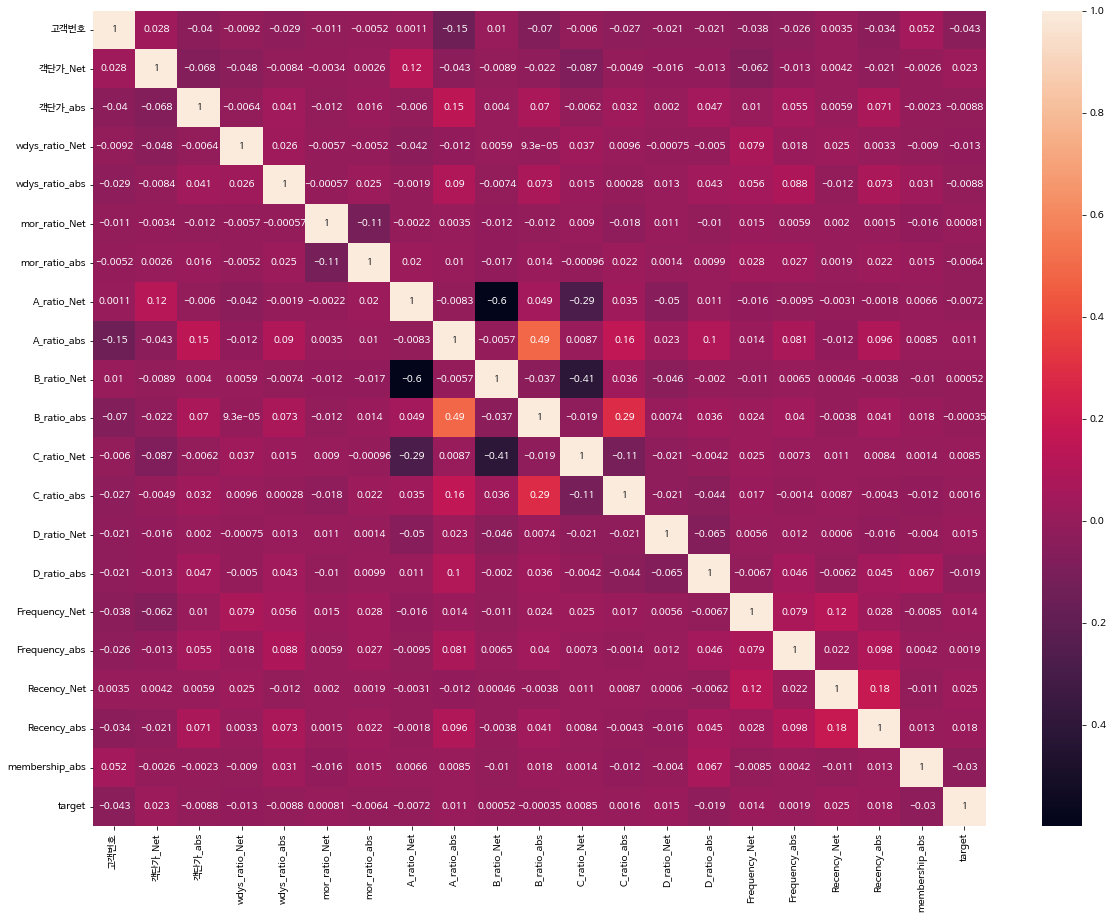

In [91]:
# test 8 - nothing #0.5258056064972492
df = test[nothing]
get_corr(df,0.69,1)

In [85]:
from sklearn.preprocessing import LabelEncoder

train_df = df.drop('고객번호',axis = 1)

encoder = LabelEncoder()


train_df['성별'] = encoder.fit_transform(train_df['성별'])
train_df['연령대'] = encoder.fit_transform(train_df['연령대'])
train_df['거주지역']=train_df['거주지역'].fillna('미정')
train_df['거주지역'] = encoder.fit_transform(train_df['거주지역'])

from sklearn.model_selection import train_test_split

X = train_df.drop('target',axis=1)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
predict = lr.predict(X_test)
accuracy_score(y_test, predict)

0.5258056064972492

0.5273775216138329

In [92]:
### regression

In [93]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/매출감소고객_예측모델_변수생성/total_df_rank_pattern.pkl','rb') as previous_df:
  prv_df = pickle.load(previous_df)


In [94]:
prv_df

,고객번호,성별,연령대,거주지역,wdys_ratio_Net,wdys_ratio_abs,mor_ratio_Net,mor_ratio_abs,A_ratio_Net,A_ratio_abs,B_ratio_Net,B_ratio_abs,C_ratio_Net,C_ratio_abs,D_ratio_Net,D_ratio_abs,가공식품_구매금액_r_Net,가공식품_구매금액_r_abs,가구/인테리어_구매금액_r_Net,가구/인테리어_구매금액_r_abs,교육/문화용품_구매금액_r_Net,교육/문화용품_구매금액_r_abs,기타_구매금액_r_Net,기타_구매금액_r_abs,디지털/가전_구매금액_r_Net,디지털/가전_구매금액_r_abs,명품_구매금액_r_Net,명품_구매금액_r_abs,신선식품_구매금액_r_Net,신선식품_구매금액_r_abs,의류_구매금액_r_Net,의류_구매금액_r_abs,일상용품_구매금액_r_Net,일상용품_구매금액_r_abs,전문스포츠/레저_구매금액_r_Net,전문스포츠/레저_구매금액_r_abs,패션잡화_구매금액_r_Net,패션잡화_구매금액_r_abs,가공식품_r_Net,가공식품_r_abs,가구/인테리어_r_Net,가구/인테리어_r_abs,교육/문화용품_r_Net,교육/문화용품_r_abs,기타_r_Net,기타_r_abs,디지털/가전_r_Net,디지털/가전_r_abs,명품_r_Net,명품_r_abs,신선식품_r_Net,신선식품_r_abs,의류_r_Net,의류_r_abs,일상용품_r_Net,일상용품_r_abs,전문스포츠/레저_r_Net,전문스포츠/레저_r_abs,패션잡화_r_Net,패션잡화_r_abs,Frequency_Net,Frequency_abs,Recency_Net,Recency_abs,target
0,1,M,60세이상,서울 강남구,-1,3,0,2,-1,1,2,4,2,2,0,0,-2,4,1,3,0,0,-3,3,5,7,5,5,0,2,1,3,-2,2,-3,11,-1,3,1,1,1,3,0,0,-4,4,4,8,4,4,1,1,0,0,-3,3,-1,13,-1,3,-1,1,-6,6,1
1,2,M,60세이상,경기 김포시,-1,7,0,4,-1,1,2,2,0,0,5,5,-1,1,0,2,0,6,0,0,0,2,5,5,-2,2,2,2,-1,3,-2,2,0,0,0,0,0,2,0,10,0,0,0,2,6,6,-2,2,1,1,6,6,0,0,1,3,-3,3,-7,7,0
2,3,M,60세이상,서울 은평구,1,1,-2,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-4,4,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-2,2,1,1,0,0,0,0,-4,6,-3,3,1
3,4,F,60세이상,서울 노원구,3,3,0,4,0,2,1,3,-1,1,0,0,2,4,0,6,0,0,0,0,0,0,0,0,2,6,0,2,2,10,-3,5,-5,5,0,2,1,3,0,0,0,0,0,0,0,0,0,4,0,2,-1,5,-1,5,-1,3,-1,5,3,3,1
4,5,M,60세이상,경기 김포시,0,4,-1,9,0,0,0,0,0,0,5,5,3,3,-5,7,0,0,0,0,-4,4,-5,5,-3,3,2,2,0,6,-2,6,-5,5,1,3,-3,3,0,0,0,0,-4,4,-4,4,0,0,-1,1,0,0,-2,6,-5,5,-7,7,-7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,19356,F,40세~44세,경기 김포시,7,7,0,6,0,0,0,2,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,-3,3,0,0,5,5,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,-4,4,0,0,4,4,0,0,0,0,8,8,0,0,0
19081,19357,F,40세~44세,대전 유성구,-3,3,5,5,-1,1,1,1,2,2,0,0,2,2,5,5,6,6,5,5,0,0,4,4,-1,1,-6,6,4,6,2,6,7,7,1,1,4,4,6,6,6,6,0,0,4,4,1,1,-5,5,1,3,2,6,4,4,9,9,2,2,0
19082,19359,M,50세~54세,경기 김포시,3,3,0,0,0,0,1,1,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,-2,2,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3,3,0,0,0,0,0,0,0,0,7,11,2,8,0
19083,19360,F,45세~49세,서울 강서구,-8,8,4,4,4,4,0,4,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,5,5,0,0,2,2,0,0,4,4,6,6,1,3,0,0,0,0,0,0,0,0,5,5,0,0,3,3,0,0,4,4,5,5,2,6,3,3,0


In [97]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(20,15))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

AxesSubplot(0.125,0.125;0.62x0.755)
{'전문스포츠/레저_구매금액_r_abs': '전문스포츠/레저_r_abs', '전문스포츠/레저_r_abs': '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net': '패션잡화_r_Net', '패션잡화_r_Net': '패션잡화_구매금액_r_Net', '의류_구매금액_r_Net': '의류_r_Net', '의류_r_Net': '의류_구매금액_r_Net', '가구/인테리어_구매금액_r_Net': '가구/인테리어_r_Net', '가구/인테리어_r_Net': '가구/인테리어_구매금액_r_Net', '전문스포츠/레저_r_Net': '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_Net': '전문스포츠/레저_r_Net', '교육/문화용품_구매금액_r_abs': '교육/문화용품_r_abs', '교육/문화용품_r_abs': '교육/문화용품_구매금액_r_abs', '교육/문화용품_r_Net': '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_Net': '교육/문화용품_r_Net', '기타_구매금액_r_abs': '기타_r_abs', '기타_r_abs': '기타_구매금액_r_abs', '기타_r_Net': '기타_구매금액_r_Net', '기타_구매금액_r_Net': '기타_r_Net', '디지털/가전_구매금액_r_abs': '디지털/가전_r_abs', '디지털/가전_r_abs': '디지털/가전_구매금액_r_abs', '디지털/가전_r_Net': '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_Net': '디지털/가전_r_Net', '명품_구매금액_r_abs': '명품_r_abs', '명품_r_abs': '명품_구매금액_r_abs', '명품_r_Net': '명품_구매금액_r_Net', '명품_구매금액_r_Net': '명품_r_Net'}


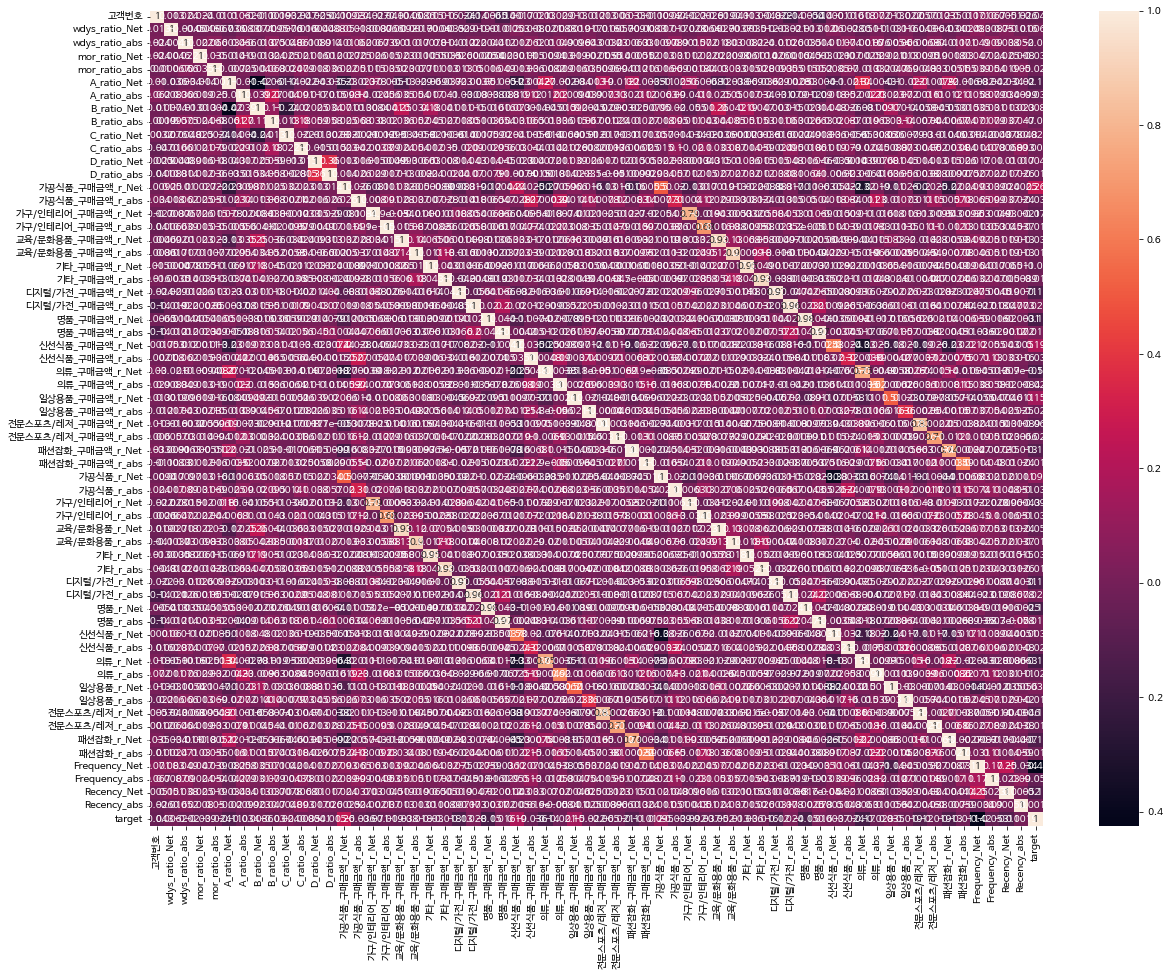

In [104]:
df = prv_df.copy()
A = get_corr(df,0.69,1)

In [101]:
test_df = ['고객번호', '성별', '연령대', '거주지역', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', '가공식품_r_Net', '가공식품_r_abs', '가구/인테리어_r_Net',
       '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs', '기타_r_Net',
       '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net', '명품_r_abs',
       '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs', '일상용품_r_Net',
       '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs', '패션잡화_r_Net',
       '패션잡화_r_abs', 'Frequency_Net', 'Frequency_abs', 'Recency_Net',
       'Recency_abs', 'target']

In [102]:
df = df[test_df]

In [105]:
from sklearn.preprocessing import LabelEncoder

train_df = df.drop('고객번호',axis = 1)

encoder = LabelEncoder()


train_df['성별'] = encoder.fit_transform(train_df['성별'])
train_df['연령대'] = encoder.fit_transform(train_df['연령대'])
train_df['거주지역']=train_df['거주지역'].fillna('미정')
train_df['거주지역'] = encoder.fit_transform(train_df['거주지역'])

from sklearn.model_selection import train_test_split

X = train_df.drop('target',axis=1)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
predict = lr.predict(X_test)
accuracy_score(y_test, predict)

0.7636887608069164

In [110]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(30,15))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

In [107]:
test2_col = ['고객번호', '성별', '연령대', '거주지역', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', '가공식품_구매금액_r_Net', '가공식품_구매금액_r_abs',
       '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs', '교육/문화용품_구매금액_r_Net',
       '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net', '기타_구매금액_r_abs',
       '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs', '명품_구매금액_r_Net',
       '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs', '의류_구매금액_r_Net',
       '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs',  'Frequency_Net', 'Frequency_abs', 'Recency_Net',
       'Recency_abs', 'target']

AxesSubplot(0.125,0.125;0.62x0.755)
{}


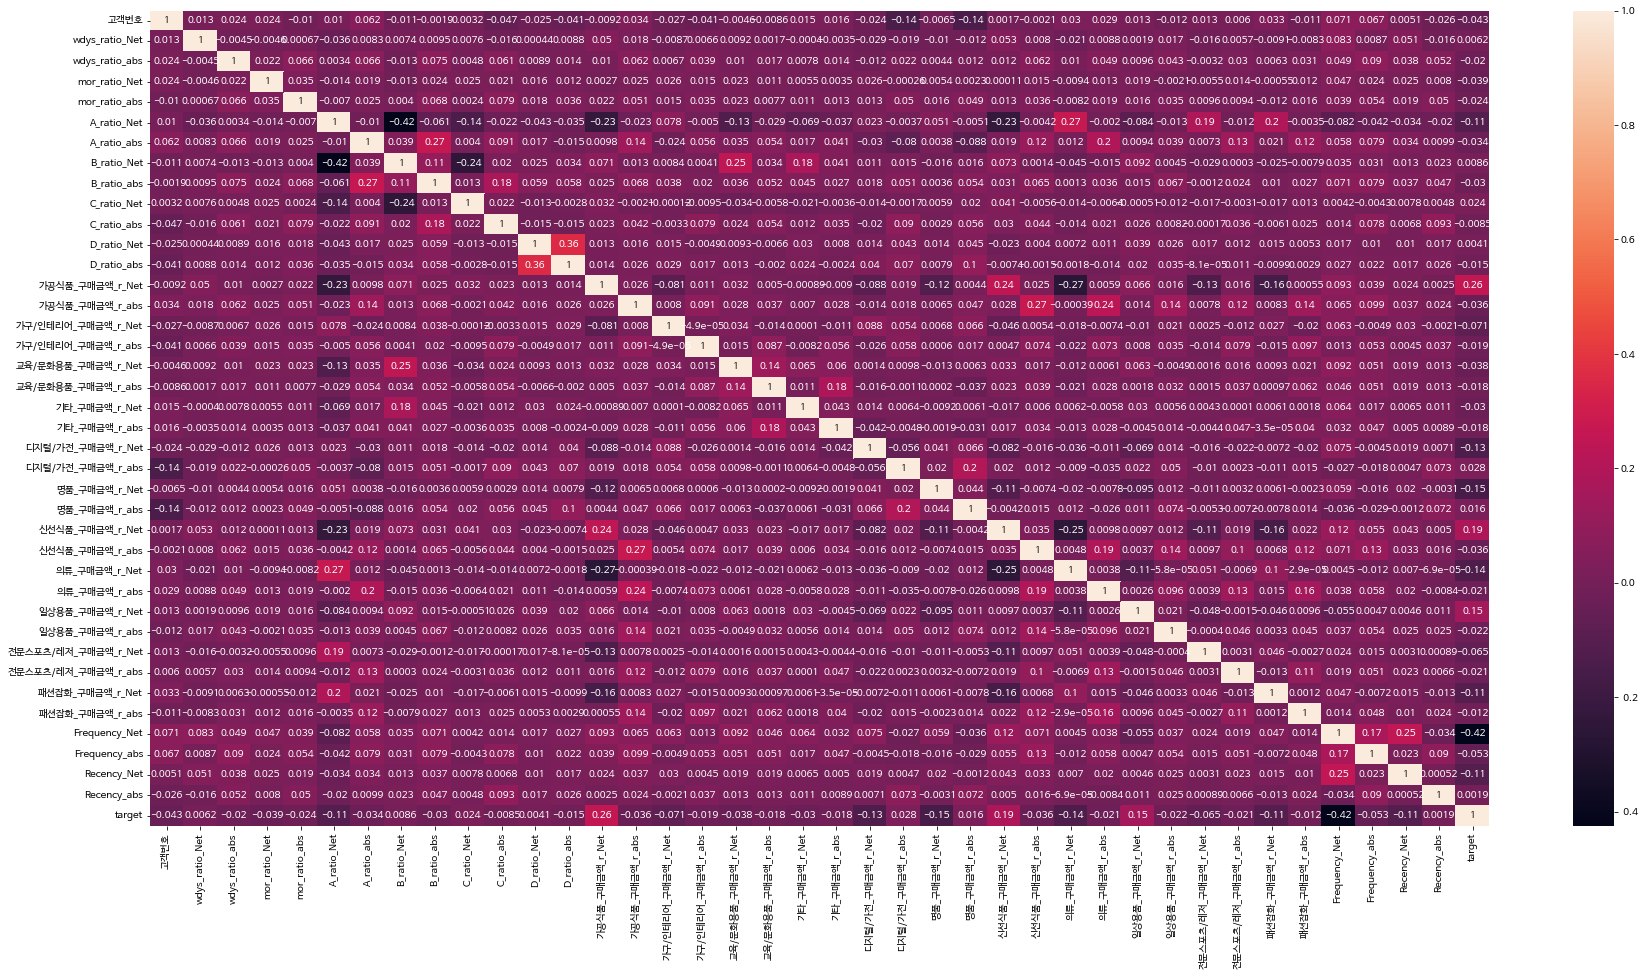

In [111]:
df = df[test2_col]
get_corr(df,0.69,1)

In [156]:
from sklearn.preprocessing import LabelEncoder
                                                                                                                                                         
train_df = df.drop('고객번호',axis = 1)

encoder = LabelEncoder()


train_df['성별'] = encoder.fit_transform(train_df['성별'])
train_df['연령대'] = encoder.fit_transform(train_df['연령대'])
train_df['거주지역']=train_df['거주지역'].fillna('미정')
train_df['거주지역'] = encoder.fit_transform(train_df['거주지역'])

from sklearn.model_selection import train_test_split

X = train_df.drop('target',axis=1)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
predict = lr.predict(X_test)
accuracy_score(y_test, predict)

0.8318050825255436

In [157]:
def lgml(df):
  from sklearn.preprocessing import LabelEncoder
                                                                                                                                                          
  train_df = df.drop('고객번호',axis = 1)

  encoder = LabelEncoder()


  train_df['성별'] = encoder.fit_transform(train_df['성별'])
  train_df['연령대'] = encoder.fit_transform(train_df['연령대'])
  train_df['거주지역']=train_df['거주지역'].fillna('미정')
  train_df['거주지역'] = encoder.fit_transform(train_df['거주지역'])

  from sklearn.model_selection import train_test_split

  X = train_df.drop('target',axis=1)
  y = train_df['target']

  X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score

  lr = LogisticRegression()

  lr.fit(X_train, y_train)
  predict = lr.predict(X_test)
  print(accuracy_score(y_test, predict))

In [158]:
lgml(test1)

0.8318050825255436


In [135]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123.pkl','rb') as train123:
  trdf = pickle.load(train123)  

In [5]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    # plt.figure(figsize=(30,15))
    # print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

In [160]:
df = trdf.copy()
df.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
       'H1_객_Net', 'H1_객_Abs', 'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs', 'H1_가공식품_app_Net',
       'H1_가공식품_ap

# 테스트 1 ALL

In [169]:
all_cols = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_객_Net', 'H1_객_Abs',
      'H1_가공식품_Net','H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
        'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs', 'H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [170]:
test1 = df[all_cols]
print(get_corr(test1,0.69,1))
print()
lgml(test1)

{'H1_의류_구매금액_Net': 'H1_의류_Net', 'H1_의류_app_Net': 'H1_의류_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs': 'H1_전문스포츠/레저_Abs', 'H1_전문스포츠/레저_Abs': 'H1_전문스포츠/레저_구매금액_Abs', 'H1_패션잡화_구매금액_Net': 'H1_패션잡화_app_Net', 'H1_패션잡화_Net': 'H1_패션잡화_구매금액_Net', 'H1_의류_Net': 'H1_의류_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Net': 'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_app_Net': 'H1_전문스포츠/레저_구매금액_Net', 'H1_가구/인테리어_구매금액_Net': 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_Net': 'H1_가구/인테리어_구매금액_Net', 'H1_패션잡화_app_Net': 'H1_패션잡화_구매금액_Net', 'H1_가구/인테리어_app_Net': 'H1_가구/인테리어_구매금액_Net', 'H1_전문스포츠/레저_Net': 'H1_전문스포츠/레저_구매금액_Net', 'H1_교육/문화용품_app_Net': 'H1_교육/문화용품_구매금액_Net', 'H1_교육/문화용품_Net': 'H1_교육/문화용품_구매금액_Net', 'H1_교육/문화용품_app_Abs': 'H1_교육/문화용품_구매금액_Abs', 'H1_교육/문화용품_Abs': 'H1_교육/문화용품_구매금액_Abs', 'H1_교육/문화용품_구매금액_Abs': 'H1_교육/문화용품_Abs', 'H1_교육/문화용품_구매금액_Net': 'H1_교육/문화용품_Net', 'H1_기타_app_Net': 'H1_기타_구매금액_Net', 'H1_기타_Net': 'H1_기타_구매금액_Net', 'H1_기타_app_Abs': 'H1_기타_구매금액_Abs', 'H1_기타_Abs': 'H1_기타_구매금액_Abs', 'H1_기타_구매금액_Abs': 'H1_기타_Abs', 'H1_기타_구매금액_Net': 'H1_

In [171]:
test2_ratio_cols = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
       'H1_객_Net', 'H1_객_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [172]:
test2 = df[test2_ratio_cols]
print(get_corr(test2,0.69,1))
print()
lgml(test2)

{}
None

0.8249934503536809


In [173]:
test3_amt = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 
       'H1_객_Net', 'H1_객_Abs', 'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs',  'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [174]:
test3 = df[test3_amt]
print(get_corr(test3,0.69,1))
print()
lgml(test3)

{}
None

0.8270893371757925


In [175]:
test4_app = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_객_Net', 'H1_객_Abs',
       'H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [176]:
test4 = df[test4_app]
print(get_corr(test4,0.69,1))
print()
lgml(test4)

{}
None

0.8265653654702646


In [189]:
def really(columns):
  global test1
  ratio = test1.corr()[columns].iloc[-1:].T
  ratio['target'] = np.abs(ratio['target'])
  A = ratio.sort_values(by='target',ascending=False)
  print(A)
  return A

In [188]:
ratio = test1.corr()[[ 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs']].iloc[-1:].T
ratio['target'] = np.abs(ratio['target'])
ratio.sort_values(by='target',ascending=False)

,target
H1_의류_Net,0.165733
H1_명품_Net,0.146592
H1_패션잡화_Net,0.127242
H1_디지털/가전_Net,0.122415
H1_전문스포츠/레저_Net,0.116531
H1_가공식품_Net,0.095354
H1_가구/인테리어_Net,0.091653
H1_교육/문화용품_Net,0.052229
H1_가공식품_Abs,0.038503
H1_가구/인테리어_Abs,0.037036


In [192]:
def really(columns):
  global test1
  ratio = test1.corr()[columns].iloc[-1:].T
  ratio['target'] = np.abs(ratio['target'])
  A = ratio.sort_values(by='target',ascending=False)
  return A

In [196]:
A = [ 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs']
really(A)

,target
H1_의류_Net,0.165733
H1_명품_Net,0.146592
H1_패션잡화_Net,0.127242
H1_디지털/가전_Net,0.122415
H1_전문스포츠/레저_Net,0.116531
H1_가공식품_Net,0.095354
H1_가구/인테리어_Net,0.091653
H1_교육/문화용품_Net,0.052229
H1_가공식품_Abs,0.038503
H1_가구/인테리어_Abs,0.037036


In [197]:
amt =['H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs']
really(amt)

,target
H1_가공식품_구매금액_Net,0.256376
H1_신선식품_구매금액_Net,0.187228
H1_명품_구매금액_Net,0.153038
H1_일상용품_구매금액_Net,0.150200
H1_의류_구매금액_Net,0.135399
H1_디지털/가전_구매금액_Net,0.130217
H1_패션잡화_구매금액_Net,0.106675
H1_가구/인테리어_구매금액_Net,0.070618
H1_전문스포츠/레저_구매금액_Net,0.064520
H1_교육/문화용품_구매금액_Net,0.037582


In [198]:
app = ['H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs']

really(app)

,target
H1_의류_app_Net,0.247412
H1_패션잡화_app_Net,0.194028
H1_가구/인테리어_app_Net,0.163985
H1_명품_app_Net,0.163051
H1_전문스포츠/레저_app_Net,0.160183
H1_일상용품_app_Net,0.156266
H1_가공식품_app_Net,0.143744
H1_디지털/가전_app_Net,0.136280
H1_신선식품_app_Net,0.110110
H1_교육/문화용품_app_Net,0.057439


# 권준기가 날 죽일라고 함

In [2]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123.pkl','rb') as train123:
  findf = pickle.load(train123)  

In [3]:
tr_test = findf[['성별', '연령대', '거주지역', 'membership_abs', '객단가_Net', '객단가_Abs',
       '가공식품_app_r_Net', '가공식품_app_r_Abs', '가구/인테리어_app_r_Net',
       '가구/인테리어_app_r_Abs', '교육/문화용품_app_r_Net', '교육/문화용품_app_r_Abs',
       '기타_app_r_Net', '기타_app_r_Abs', '디지털/가전_app_r_Net', '디지털/가전_app_r_Abs',
       '명품_app_r_Net', '명품_app_r_Abs', '신선식품_app_r_Net', '신선식품_app_r_Abs',
       '의류_app_r_Net', '의류_app_r_Abs', '일상용품_app_r_Net', '일상용품_app_r_Abs',
       '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_Abs', '패션잡화_app_r_Net',
       '패션잡화_app_r_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']]

In [6]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    # plt.figure(figsize=(30,15))
    # print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

In [7]:
get_corr(tr_test,0.69,1)

{}


In [15]:
from sklearn.model_selection import train_test_split
X = tr_test.drop('target',axis=1)
y = tr_test['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
svm = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

from tqdm import tqdm

models = [lr,svm,dt_clf,rf_clf]
for model in tqdm(models):
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)
    # globals()[f'{varName(model)}_pred_proba'] = model.predict_proba(X_test)

100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


In [18]:
svm_pred

array([1, 0, 0, ..., 0, 0, 0])

In [225]:
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    acc_score = accuracy_score(y_test, predict)
    print('{}_score : {}', model, acc_score)

NameError: ignored

In [32]:
def get_eval(y_test,prediction):
  from sklearn.metrics import confusion_matrix , precision_score, accuracy_score, recall_score, f1_score
  Label = np.unique([y_test, prediction])
  confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                          index=['true:{:}'.format(x) for x in Label], 
                          columns=['pred:{:}'.format(x) for x in Label])
  accuracy = accuracy_score(y_test,prediction)
  precision = precision_score(y_test,prediction)
  recall = recall_score(y_test,prediction)
  f1 = f1_score(y_test,prediction)
  # roc_auc = roc_auc_score(y_test,proba)
  # print('[model]:', model,'\n')
  print('\n[confusion_matrix]\n\n', confusion,'\n')
  print('[accuracy]: {:.4f}'.format(accuracy))
  print('[precision]: {:.4f}'.format(accuracy))
  print('[recall]: {:.4f}'.format(recall))
  print('[f1_score]: {:.4f}'.format(f1))
  # print('[roc_auc]: {:.4f}'.format(roc_auc))
  print('-------'*10)

In [34]:
predicts = [lr_pred,svm_pred,dt_clf_pred,rf_clf_pred]
for predict in tqdm(predicts):
  get_eval(y_test,predict)

100%|██████████| 4/4 [00:00<00:00, 65.67it/s]


[confusion_matrix]

         pred:0  pred:1
true:0    1602     334
true:1     327    1554 

[accuracy]: 0.8268
[precision]: 0.8268
[recall]: 0.8262
[f1_score]: 0.8246
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1578     358
true:1     348    1533 

[accuracy]: 0.8150
[precision]: 0.8150
[recall]: 0.8150
[f1_score]: 0.8128
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1463     473
true:1     430    1451 

[accuracy]: 0.7634
[precision]: 0.7634
[recall]: 0.7714
[f1_score]: 0.7627
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1611     325
true:1     350    1531 

[accuracy]: 0.8232
[precision]: 0.8232
[recall]: 0.8139
[f1_score]: 0.8194
----------------------------------------------------------------------


In [37]:
# logistic 사용
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234.pkl','rb') as test_df:
  test_df = pickle.load(test_df)

In [44]:
test = test_df[['성별', '연령대', '거주지역', 'membership_abs', '객단가_Net', '객단가_Abs',
       '가공식품_app_r_Net', '가공식품_app_r_Abs', '가구/인테리어_app_r_Net',
       '가구/인테리어_app_r_Abs', '교육/문화용품_app_r_Net', '교육/문화용품_app_r_Abs',
       '기타_app_r_Net', '기타_app_r_Abs', '디지털/가전_app_r_Net', '디지털/가전_app_r_Abs',
       '명품_app_r_Net', '명품_app_r_Abs', '신선식품_app_r_Net', '신선식품_app_r_Abs',
       '의류_app_r_Net', '의류_app_r_Abs', '일상용품_app_r_Net', '일상용품_app_r_Abs',
       '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_Abs', '패션잡화_app_r_Net',
       '패션잡화_app_r_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']]

In [46]:
get_corr(test,0.69,1)

{}


In [49]:
test.shape

(19085, 45)

In [53]:
검증 = test.drop('target',axis=1)
검증

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,교육/문화용품_app_r_Net,교육/문화용품_app_r_Abs,기타_app_r_Net,기타_app_r_Abs,디지털/가전_app_r_Net,디지털/가전_app_r_Abs,명품_app_r_Net,명품_app_r_Abs,신선식품_app_r_Net,신선식품_app_r_Abs,의류_app_r_Net,의류_app_r_Abs,일상용품_app_r_Net,일상용품_app_r_Abs,전문스포츠/레저_app_r_Net,전문스포츠/레저_app_r_Abs,패션잡화_app_r_Net,패션잡화_app_r_Abs,wdys_ratio_Net,wdys_ratio_Abs,mor_ratio_Net,mor_ratio_Abs,A_ratio_Net,A_ratio_Abs,B_ratio_Net,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs
0,0,5,20,0.000000,0,0,-2,12,1,11,-1,5,0,0,0,10,0,0,8,10,-7,11,-3,15,-8,8,-4,12,-2,4,-4,4,-1,1,1,1,0,6,0,0,-4,8,3,3
1,0,6,14,0.000000,0,0,6,12,-2,8,-7,7,0,0,-1,5,2,10,-8,24,0,6,-3,13,6,8,3,11,3,3,-3,3,0,2,-1,5,3,3,5,5,-1,5,-5,9
2,0,7,1,0.000000,-1,3,-7,7,-2,8,2,10,-6,6,-4,8,-6,16,-5,19,-3,9,5,15,-2,6,2,4,-1,3,3,5,-1,1,0,0,0,6,0,0,1,5,-2,6
3,0,3,7,0.000000,2,4,-8,8,5,7,0,0,0,0,2,10,-6,6,-8,12,5,7,-2,16,1,5,6,8,-6,16,2,8,-1,3,-1,3,5,5,0,0,-4,6,-7,7
4,0,6,18,0.000000,1,1,4,8,4,14,0,4,6,16,1,9,5,7,4,6,3,5,4,6,-8,12,-1,5,3,9,-1,1,1,1,0,0,2,2,0,0,-3,3,-5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,1,1,0.000000,-2,2,6,6,0,16,0,0,0,12,0,0,0,0,0,18,6,24,-1,3,8,22,0,0,3,13,3,3,4,12,0,6,0,0,0,0,2,2,0,10
19081,0,1,1,1.000000,-2,4,-6,18,4,20,0,14,0,0,0,0,6,6,0,18,6,10,-4,12,8,8,0,16,1,11,-1,3,4,6,2,6,0,6,0,0,2,2,-1,15
19082,1,5,30,0.000000,-3,7,1,17,0,0,0,0,0,0,0,0,0,0,0,18,0,0,-1,13,0,0,8,8,-8,10,4,4,4,4,0,0,5,9,0,0,0,0,2,2
19083,0,1,33,0.000000,0,2,-7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,18,-1,3,0,0,0,0,7,7,2,4,0,6,2,2,0,0,0,0,0,4,0,14


In [57]:
final_prediction = lr.predict(검증)

In [58]:
정확도검증 = test['target']
정확도검증

0        1
1        0
2        1
3        0
4        1
        ..
19080    0
19081    0
19082    1
19083    0
19084    0
Name: target, Length: 19085, dtype: int64

In [59]:
get_eval(정확도검증,final_prediction)


[confusion_matrix]

         pred:0  pred:1
true:0    8218     943
true:1    2286    7638 

[accuracy]: 0.8308
[precision]: 0.8308
[recall]: 0.7696
[f1_score]: 0.8255
----------------------------------------------------------------------


In [61]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

In [62]:
get_top_features(lr)

AttributeError: ignored

# 모델완성

In [60]:
test_df

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_r_Net,가공식품_r_Abs,가구/인테리어_r_Net,가구/인테리어_r_Abs,교육/문화용품_r_Net,교육/문화용품_r_Abs,기타_r_Net,기타_r_Abs,디지털/가전_r_Net,디지털/가전_r_Abs,명품_r_Net,명품_r_Abs,신선식품_r_Net,신선식품_r_Abs,의류_r_Net,의류_r_Abs,일상용품_r_Net,일상용품_r_Abs,전문스포츠/레저_r_Net,전문스포츠/레저_r_Abs,패션잡화_r_Net,패션잡화_r_Abs,가공식품_구매금액_r_Net,가공식품_구매금액_r_Abs,가구/인테리어_구매금액_r_Net,가구/인테리어_구매금액_r_Abs,교육/문화용품_구매금액_r_Net,교육/문화용품_구매금액_r_Abs,기타_구매금액_r_Net,기타_구매금액_r_Abs,디지털/가전_구매금액_r_Net,디지털/가전_구매금액_r_Abs,명품_구매금액_r_Net,명품_구매금액_r_Abs,...,패션잡화_구매금액_r_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,교육/문화용품_app_r_Net,교육/문화용품_app_r_Abs,기타_app_r_Net,기타_app_r_Abs,디지털/가전_app_r_Net,디지털/가전_app_r_Abs,명품_app_r_Net,명품_app_r_Abs,신선식품_app_r_Net,신선식품_app_r_Abs,의류_app_r_Net,의류_app_r_Abs,일상용품_app_r_Net,일상용품_app_r_Abs,전문스포츠/레저_app_r_Net,전문스포츠/레저_app_r_Abs,패션잡화_app_r_Net,패션잡화_app_r_Abs,wdys_ratio_Net,wdys_ratio_Abs,mor_ratio_Net,mor_ratio_Abs,A_ratio_Net,A_ratio_Abs,B_ratio_Net,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,target
0,0,5,20,0.000000,0,0,-2,4,0,4,2,4,0,0,1,9,0,0,0,0,0,0,3,5,-4,6,-2,8,0,0,1,1,0,2,0,0,1,7,0,0,...,2,-2,12,1,11,-1,5,0,0,0,10,0,0,8,10,-7,11,-3,15,-8,8,-4,12,-2,4,-4,4,-1,1,1,1,0,6,0,0,-4,8,3,3,1
1,0,6,14,0.000000,0,0,2,2,0,0,-7,7,0,0,-1,1,0,10,-2,4,2,8,-1,7,1,1,2,4,0,2,-3,5,-5,5,0,0,-2,4,0,10,...,7,6,12,-2,8,-7,7,0,0,-1,5,2,10,-8,24,0,6,-3,13,6,8,3,11,3,3,-3,3,0,2,-1,5,3,3,5,5,-1,5,-5,9,0
2,0,7,1,0.000000,-1,3,0,0,0,0,-1,7,-3,3,-4,4,-6,18,1,1,-1,1,0,2,-1,1,1,1,1,5,1,1,0,8,-3,3,-4,8,-6,18,...,5,-7,7,-2,8,2,10,-6,6,-4,8,-6,16,-5,19,-3,9,5,15,-2,6,2,4,-1,3,3,5,-1,1,0,0,0,6,0,0,1,5,-2,6,1
3,0,3,7,0.000000,2,4,3,7,3,7,0,0,0,0,1,11,-6,6,-1,9,-2,2,-3,5,0,2,-1,3,-2,2,4,12,0,0,0,0,2,10,-6,6,...,1,-8,8,5,7,0,0,0,0,2,10,-6,6,-8,12,5,7,-2,16,1,5,6,8,-6,16,2,8,-1,3,-1,3,5,5,0,0,-4,6,-7,7,0
4,0,6,18,0.000000,1,1,1,1,0,4,1,1,4,12,1,7,6,6,-2,2,1,1,5,5,-4,14,1,1,0,0,0,4,-1,1,3,9,1,7,6,6,...,3,4,8,4,14,0,4,6,16,1,9,5,7,4,6,3,5,4,6,-8,12,-1,5,3,9,-1,1,1,1,0,0,2,2,0,0,-3,3,-5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,1,1,0.000000,-2,2,4,6,0,8,0,0,0,8,0,0,0,0,0,0,4,14,0,0,4,14,0,0,3,3,0,6,0,0,0,6,0,0,0,0,...,0,6,6,0,16,0,0,0,12,0,0,0,0,0,18,6,24,-1,3,8,22,0,0,3,13,3,3,4,12,0,6,0,0,0,0,2,2,0,10,0
19081,0,1,1,1.000000,-2,4,0,4,5,11,0,8,0,0,0,0,5,5,0,0,5,11,0,0,4,4,0,6,0,0,6,16,0,8,0,0,0,0,4,4,...,2,-6,18,4,20,0,14,0,0,0,0,6,6,0,18,6,10,-4,12,8,8,0,16,1,11,-1,3,4,6,2,6,0,6,0,0,2,2,-1,15,0
19082,1,5,30,0.000000,-3,7,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,1,1,0,0,0,0,0,0,0,0,0,0,...,8,1,17,0,0,0,0,0,0,0,0,0,0,0,18,0,0,-1,13,0,0,8,8,-8,10,4,4,4,4,0,0,5,9,0,0,0,0,2,2,1
19083,0,1,33,0.000000,0,2,-3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,-2,4,0,0,0,0,0,0,0,0,0,0,...,0,-7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,18,-1,3,0,0,0,0,7,7,2,4,0,6,2,2,0,0,0,0,0,4,0,14,0


In [64]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [65]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

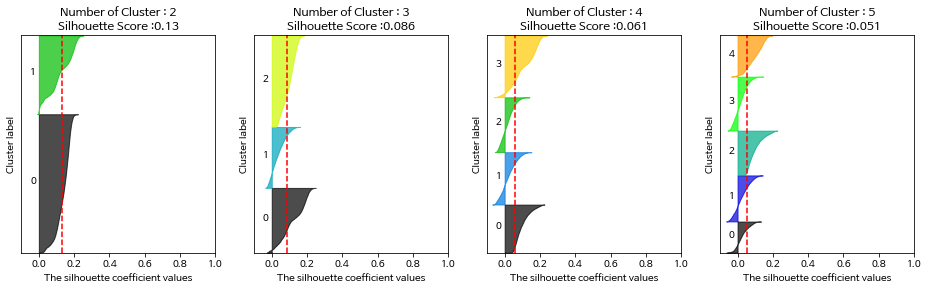

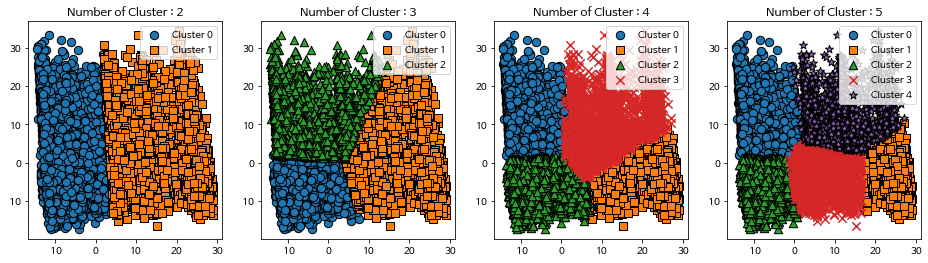

In [67]:
visualize_silhouette([ 2, 3, 4, 5], test_df)
visualize_kmeans_plot_multi([2,3,4,5],test_df)

NameError: ignored